# Linear Regression

Import required packages

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [41]:
fuelData = pd.read_csv("FuelConsumptionCo2.csv")
print(fuelData.dtypes)
print(fuelData.isna().values.any())

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object
False


In [42]:
print(fuelData.info())
print(fuelData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

Select particular column, and visualise the data (histogram)

   CYLINDERS  ENGINESIZE  ...  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB_MPG
0          4         2.0  ...                  6.7                        33
1          4         2.4  ...                  7.7                        29
2          4         1.5  ...                  5.8                        48
3          6         3.5  ...                  9.1                        25
4          6         3.5  ...                  8.7                        27

[5 rows x 7 columns]


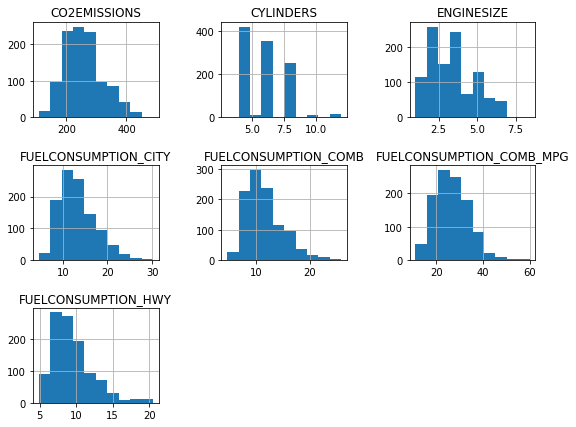

In [43]:
newFuelData = fuelData[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"]]
print(newFuelData.head())
newFuelData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

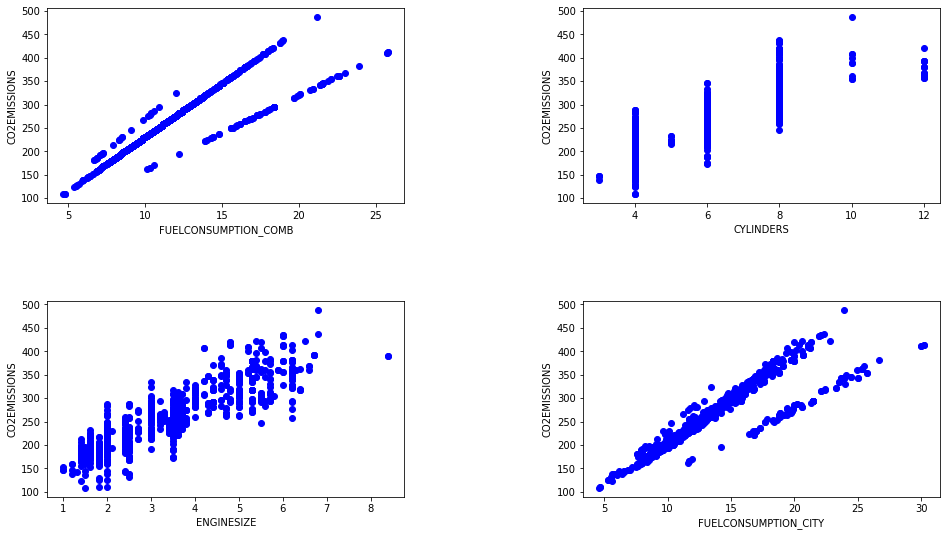

In [44]:
plt.subplot(221)
plt.scatter(newFuelData["FUELCONSUMPTION_COMB"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

plt.subplot(222)
plt.scatter(newFuelData["CYLINDERS"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

plt.subplot(223)
plt.scatter(newFuelData["ENGINESIZE"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

plt.subplot(224)
plt.scatter(newFuelData["FUELCONSUMPTION_CITY"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Engine Size

In [45]:
train, test = train_test_split(newFuelData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[39.11482049]]
Intercept:  [124.61981467]


Visualise the regression to the plot

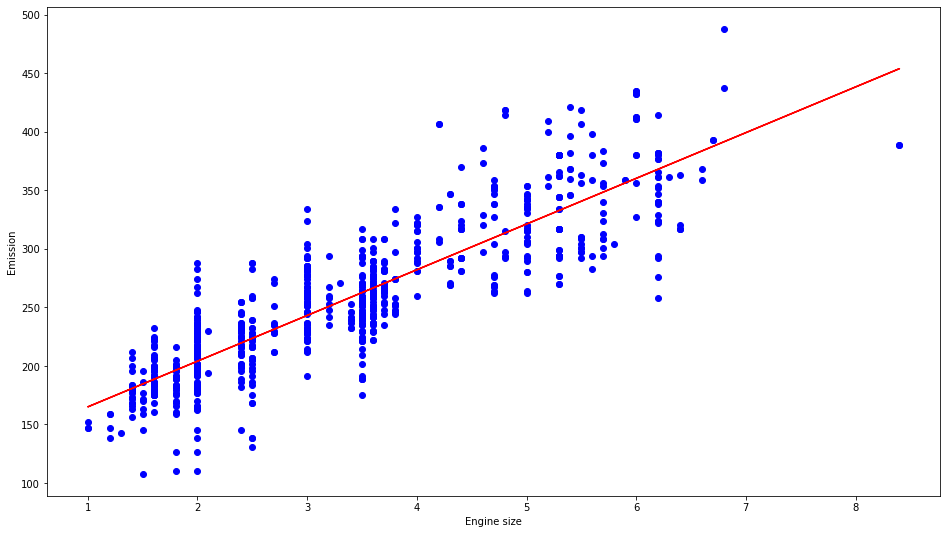

In [32]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train[["ENGINESIZE"]], regression.coef_ * train[["ENGINESIZE"]] + regression.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

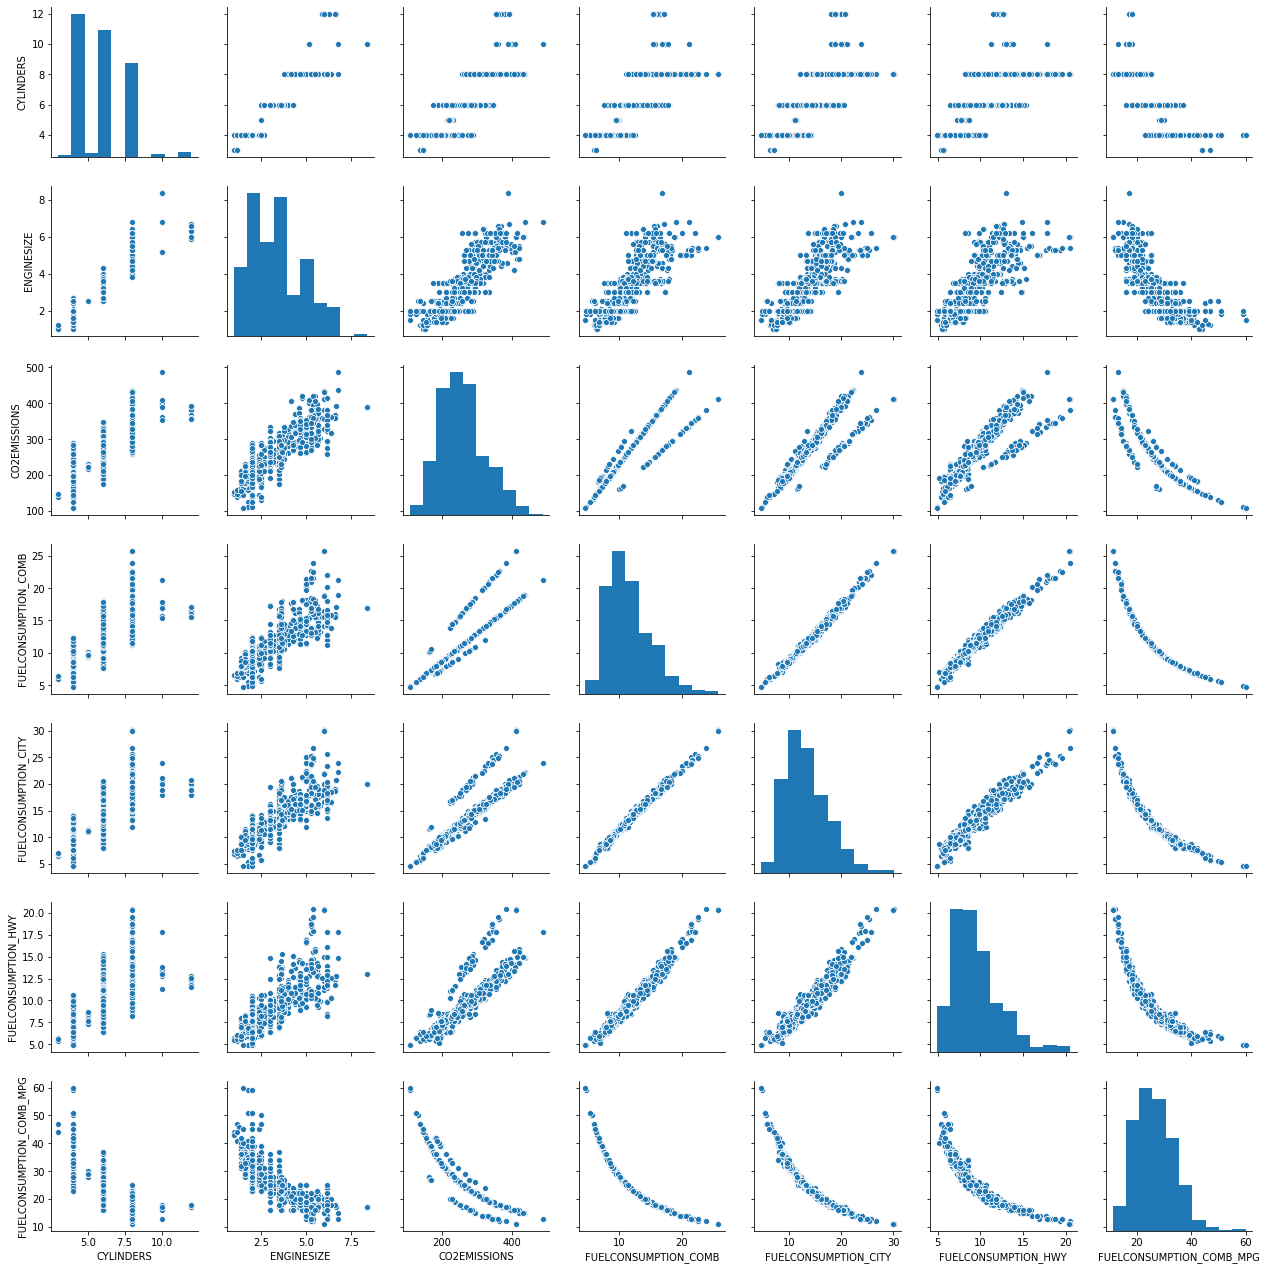

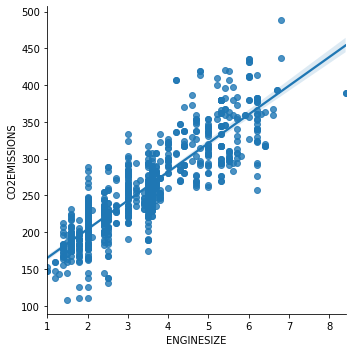

In [33]:
sb.pairplot(train)
sb.lmplot("ENGINESIZE", "CO2EMISSIONS", data = train)
plt.show()

Predict new data & evaluate the model

In [34]:
prediction = regression.predict(test[["ENGINESIZE"]])
for i in range(len(test)):
  print(test[["ENGINESIZE"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["CO2EMISSIONS"]], prediction))
print("MSE : ", mean_squared_error(test[["CO2EMISSIONS"]], prediction))
print("R2 : ", r2_score(test[["CO2EMISSIONS"]], prediction))


[3.6] [266.50528544]
[2.] [204.02748398]
[2.] [204.02748398]
[3.6] [266.50528544]
[2.4] [219.64693434]
[2.] [204.02748398]
[1.6] [188.40803361]
[2.] [204.02748398]
[2.4] [219.64693434]
[3.6] [266.50528544]
[3.3] [254.79069767]
[1.5] [184.50317102]
[3.5] [262.60042285]
[2.] [204.02748398]
[2.4] [219.64693434]
[3.7] [270.41014803]
[3.5] [262.60042285]
[4.] [282.12473581]
[2.4] [219.64693434]
[3.5] [262.60042285]
[2.5] [223.55179693]
[1.4] [180.59830843]
[5.3] [332.8879495]
[2.] [204.02748398]
[5.] [321.17336172]
[1.6] [188.40803361]
[1.6] [188.40803361]
[2.] [204.02748398]
[1.6] [188.40803361]
[5.2] [328.98308691]
[3.5] [262.60042285]
[3.7] [270.41014803]
[2.4] [219.64693434]
[1.4] [180.59830843]
[5.5] [340.69767468]
[6.5] [379.7463006]
[5.7] [348.50739986]
[2.] [204.02748398]
[5.3] [332.8879495]
[4.6] [305.55391136]
[4.4] [297.74418617]
[2.] [204.02748398]
[2.] [204.02748398]
[3.6] [266.50528544]
[1.8] [196.21775879]
[3.] [243.07610989]
[2.5] [223.55179693]
[1.8] [196.21775879]
[1.8] [1

# Classification - KNN

Import all required packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


Load & profile the data

In [36]:
dataTitanic = pd.read_csv("titanic_train.csv")

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes)
  if dataTitanic[i].isna().values.any() and dataTitanic[i].dtypes != object:
      dataTitanic[i] = dataTitanic[i].fillna(dataTitanic[i].mean())

train, test = train_test_split(dataTitanic, test_size=0.1)


passenger_id int64
pclass int64
name object
sex object
age float64
sibsp int64
parch int64
ticket object
fare float64
cabin object
embarked object
boat object
body float64
home.dest object
survived int64


Training Proces

In [0]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["age", "fare"]], train["survived"])

Clasify new data & evaluate the model

In [38]:
newClassification = KNN.predict([[17,8],[8,10]])
print(newClassification)

classification = KNN.predict(test[["age", "fare"]])
accuracy = accuracy_score(test["survived"], classification)
MAE = mean_absolute_error(test["survived"], classification)
MSE = mean_squared_error(test["survived"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)


[0 1]
 ACC : 0.65
 MAE : 0.35
 MSE : 0.35


Identify the best K

In [39]:
Ks = 10
accuracy = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(train[["age", "fare"]], train["survived"])  
    classification = KNN.predict(test[["age", "fare"]])
    accuracy[n - 1] = accuracy_score(test["survived"], classification)
    
print("Best  ACC : %.2f" % accuracy.max(), ", with k = ", accuracy.argmax() + 1)


Best  ACC : 0.69 , with k =  1
